In [480]:
import pandas as pd
from datetime import datetime
import numpy as np

In [481]:
industry_metrics = pd.read_csv("https://www1.nyc.gov/assets/tlc/downloads/csv/data_reports_monthly.csv")

In [482]:
industry_metrics

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared
0,2022-12,FHV - Livery,"17,750",-,"4,059","3,888","2,577",20.6,5.1,20.1,5.0,20,-,-
1,2022-12,FHV - Lux Limo,"1,068",-,"1,654","1,604",521,10.1,2.0,10.0,2.0,67,-,-
2,2022-12,FHV - Black Car,"19,063",-,"7,852","7,550","3,178",13.0,4.5,12.8,4.4,28,-,-
3,2022-12,Green,"2,336","45,208",965,942,496,16.3,3.6,16.1,3.5,15.9,66%,-
4,2022-12,Yellow,"109,290","2,358,924","10,749","7,791","6,529",26.0,8.7,22.0,7.5,16.9,79%,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,2010-05,Yellow,"499,374","5,561,218","30,950","13,309","12,729",29.6,14.8,22.7,8.3,-,35%,-
649,2010-04,Yellow,"504,798","5,502,545","30,827","13,326","12,856",28.9,14.8,22.3,8.3,-,35%,-
650,2010-03,Yellow,"415,567","3,011,750","28,709","12,183","10,382",26.4,15.1,20.4,8.3,11.5,35%,-
651,2010-02,Yellow,"397,969","3,392,416","28,255","12,171","10,045",23.1,14.6,17.6,8.3,11.1,35%,-


Convert column names to lowercase

In [483]:
industry_metrics.columns = industry_metrics.columns.str.lower()
industry_metrics.columns

Index(['month/year', 'license class',
       '               trips per day               ',
       '               farebox per day               ',
       '                unique drivers                ',
       '                unique vehicles                ',
       '                vehicles per day                ',
       '           avg days vehicles on road           ',
       '           avg hours per day per vehicle           ',
       '           avg days drivers on road           ',
       '           avg hours per day per driver           ',
       '           avg minutes per trip           ',
       'percent of trips paid with credit card', ' trips per day shared '],
      dtype='object')

In [484]:
industry_metrics.columns = [col.strip() for col in industry_metrics.columns]

In [485]:
industry_metrics.columns

Index(['month/year', 'license class', 'trips per day', 'farebox per day',
       'unique drivers', 'unique vehicles', 'vehicles per day',
       'avg days vehicles on road', 'avg hours per day per vehicle',
       'avg days drivers on road', 'avg hours per day per driver',
       'avg minutes per trip', 'percent of trips paid with credit card',
       'trips per day shared'],
      dtype='object')

In [486]:
industry_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   month/year                              653 non-null    object 
 1   license class                           653 non-null    object 
 2   trips per day                           653 non-null    object 
 3   farebox per day                         649 non-null    object 
 4   unique drivers                          653 non-null    object 
 5   unique vehicles                         653 non-null    object 
 6   vehicles per day                        653 non-null    object 
 7   avg days vehicles on road               653 non-null    float64
 8   avg hours per day per vehicle           653 non-null    float64
 9   avg days drivers on road                653 non-null    float64
 10  avg hours per day per driver            653 non-null    float6

Remove "%" and Convert percent_of_trips_paid_with_credit_card to numeric

In [487]:

industry_metrics['percent of trips paid with credit card'] = industry_metrics['percent of trips paid with credit card'].replace({'%': '','-':''}, regex=True) #.astype(float)
industry_metrics['percent of trips paid with credit card'] = pd.to_numeric(industry_metrics['percent of trips paid with credit card'], errors='coerce') / 100
industry_metrics['percent of trips paid with credit card'] = industry_metrics['percent of trips paid with credit card'].fillna(0.0)
industry_metrics['percent of trips paid with credit card']

0      0.00
1      0.00
2      0.00
3      0.66
4      0.79
       ... 
648    0.35
649    0.35
650    0.35
651    0.35
652    0.32
Name: percent of trips paid with credit card, Length: 653, dtype: float64

Create month_year and drop month/year column

In [488]:
industry_metrics["date"] = pd.to_datetime(industry_metrics["month/year"], format="%Y/%m").dt.strftime('%Y-%m')
industry_metrics.drop(columns=["month/year"], inplace=True)
industry_metrics["date"]

0      2022-12
1      2022-12
2      2022-12
3      2022-12
4      2022-12
        ...   
648    2010-05
649    2010-04
650    2010-03
651    2010-02
652    2010-01
Name: date, Length: 653, dtype: object

convert columns to numeric

In [489]:
industry_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   license class                           653 non-null    object 
 1   trips per day                           653 non-null    object 
 2   farebox per day                         649 non-null    object 
 3   unique drivers                          653 non-null    object 
 4   unique vehicles                         653 non-null    object 
 5   vehicles per day                        653 non-null    object 
 6   avg days vehicles on road               653 non-null    float64
 7   avg hours per day per vehicle           653 non-null    float64
 8   avg days drivers on road                653 non-null    float64
 9   avg hours per day per driver            653 non-null    float64
 10  avg minutes per trip                    653 non-null    object

In [490]:
industry_metrics.columns

Index(['license class', 'trips per day', 'farebox per day', 'unique drivers',
       'unique vehicles', 'vehicles per day', 'avg days vehicles on road',
       'avg hours per day per vehicle', 'avg days drivers on road',
       'avg hours per day per driver', 'avg minutes per trip',
       'percent of trips paid with credit card', 'trips per day shared',
       'date'],
      dtype='object')

In [491]:
industry_metrics['trips per day'] = industry_metrics['trips per day'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['trips per day']

0       17750
1        1068
2       19063
3        2336
4      109290
        ...  
648    499374
649    504798
650    415567
651    397969
652    479376
Name: trips per day, Length: 653, dtype: int64

In [492]:
industry_metrics.head()

,license class,trips per day,farebox per day,unique drivers,unique vehicles,vehicles per day,avg days vehicles on road,avg hours per day per vehicle,avg days drivers on road,avg hours per day per driver,avg minutes per trip,percent of trips paid with credit card,trips per day shared,date
0,FHV - Livery,17750,-,"4,059","3,888","2,577",20.6,5.1,20.1,5.0,20,0.00,-,2022-12
1,FHV - Lux Limo,1068,-,"1,654","1,604",521,10.1,2.0,10.0,2.0,67,0.00,-,2022-12
2,FHV - Black Car,19063,-,"7,852","7,550","3,178",13.0,4.5,12.8,4.4,28,0.00,-,2022-12
3,Green,2336,"45,208",965,942,496,16.3,3.6,16.1,3.5,15.9,0.66,-,2022-12
4,Yellow,109290,"2,358,924","10,749","7,791","6,529",26.0,8.7,22.0,7.5,16.9,0.79,-,2022-12


In [493]:
industry_metrics['farebox per day'].unique()

array([' - ', '45,208', '2,358,924', '35,984', '2,088,897', '  -  ',
       '2,293,014', '39,960', '   -   ', '2,100,507', '43,814',
       '    -    ', '38,915', '1,918,370', '     -     ', '1,921,789',
       '37,356', '2,057,705', '44,572', '44,850', '2,234,977',
       '        -        ', '         -         ', '2,219,127', '43,591',
       '          -           ', '42,436', '2,097,334', '40,475',
       '          -          ', '1,805,865', '1,330,596',
       '           -           ', '32,510', '1,903,870',
       '            -            ', '70,840', '2,103,014', '82,076',
       '             -             ', '              -              ',
       '1,993,228', '82,093', '               -               ', '77,261',
       '1,826,391', '1,611,851', '63,670', '63,047', '1,605,062',
       '65,833', '1,607,814', '65,575', '1,340,447', '67,873',
       '1,182,789', '62,408', '979,149',
       '                -                ', '52,276', '755,115', nan,
       '56,409', '688,8

In [494]:
industry_metrics['farebox per day'] = industry_metrics['farebox per day'].apply(lambda x: x.strip() if isinstance(x, str) else x)
industry_metrics['farebox per day'] = industry_metrics['farebox per day'].replace('-', '0')
industry_metrics['farebox per day'] = industry_metrics['farebox per day'].fillna('0')
industry_metrics['farebox per day'] = industry_metrics['farebox per day'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['farebox per day'] = pd.to_numeric(industry_metrics['farebox per day'])
industry_metrics['farebox per day']

0            0
1            0
2            0
3        45208
4      2358924
        ...   
648    5561218
649    5502545
650    3011750
651    3392416
652    4968817
Name: farebox per day, Length: 653, dtype: int64

In [495]:
industry_metrics['unique drivers'] = industry_metrics['unique drivers'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['unique drivers']

0       4059
1       1654
2       7852
3        965
4      10749
       ...  
648    30950
649    30827
650    28709
651    28255
652    30659
Name: unique drivers, Length: 653, dtype: int64

In [496]:
industry_metrics['unique vehicles'] = industry_metrics['unique vehicles'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['unique vehicles']

0       3888
1       1604
2       7550
3        942
4       7791
       ...  
648    13309
649    13326
650    12183
651    12171
652    13305
Name: unique vehicles, Length: 653, dtype: int64

In [497]:
industry_metrics['vehicles per day'] = industry_metrics['vehicles per day'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['vehicles per day']

0       2577
1        521
2       3178
3        496
4       6529
       ...  
648    12729
649    12856
650    10382
651    10045
652    12727
Name: vehicles per day, Length: 653, dtype: int64

In [498]:
industry_metrics['avg minutes per trip'] = industry_metrics['avg minutes per trip'].apply(lambda x: x.strip().replace('-',''))
industry_metrics['avg minutes per trip'] = industry_metrics['avg minutes per trip'].fillna('0')
industry_metrics['avg minutes per trip'] = pd.to_numeric(industry_metrics['avg minutes per trip'])
industry_metrics['avg minutes per trip'] = industry_metrics['avg minutes per trip'].fillna(0.0)
industry_metrics['avg minutes per trip']

0      20.0
1      67.0
2      28.0
3      15.9
4      16.9
       ... 
648     0.0
649     0.0
650    11.5
651    11.1
652     0.0
Name: avg minutes per trip, Length: 653, dtype: float64

In [499]:
industry_metrics['trips per day shared'].unique()

array(['-', ' -   ', '10,672', ' - ', '9,336', '3,573', '443', '466',
       '853', '133', '277', '716', '723', '635', '124', '  -  ', '41,051',
       '97,117', '90,550', '93,421', '103,379', '107,676', '107,780',
       '104,983', '104,074', '101,645', '124,106', '141,734', '157,704',
       '171,912', nan, '104', '157,678', '30', '128', '164,666', '35',
       '17,734', '160,672', '36', '158', '176,348', '34', '291',
       '148,283', '16', '168,299', '15', '13', '163,171', '18', '143,298',
       '148,036', '160,806', '14', '157,162', '12', '140,622', '19',
       '126,738', '118,649', '107,750', '92,641', '84,200', '76,026', '6',
       '68,756', '63,620'], dtype=object)

In [500]:
industry_metrics['trips per day shared'] = industry_metrics['trips per day shared'].apply(lambda x: x.strip() if isinstance(x, str) else x)
industry_metrics['trips per day shared'] = industry_metrics['trips per day shared'].fillna('0')
industry_metrics['trips per day shared'] = industry_metrics['trips per day shared'].replace({'-':'0',',':''}, regex=True)
industry_metrics['trips per day shared'] = pd.to_numeric(industry_metrics['trips per day shared'])
industry_metrics['trips per day shared'].unique()

array([     0,  10672,   9336,   3573,    443,    466,    853,    133,
          277,    716,    723,    635,    124,  41051,  97117,  90550,
        93421, 103379, 107676, 107780, 104983, 104074, 101645, 124106,
       141734, 157704, 171912,    104, 157678,     30,    128, 164666,
           35,  17734, 160672,     36,    158, 176348,     34,    291,
       148283,     16, 168299,     15,     13, 163171,     18, 143298,
       148036, 160806,     14, 157162,     12, 140622,     19, 126738,
       118649, 107750,  92641,  84200,  76026,      6,  68756,  63620])

In [501]:
# convert column names to lowercase and replace spaces with underscores
industry_metrics.columns = industry_metrics.columns.str.lower().str.replace(" ", "_")
industry_metrics.columns 

Index(['license_class', 'trips_per_day', 'farebox_per_day', 'unique_drivers',
       'unique_vehicles', 'vehicles_per_day', 'avg_days_vehicles_on_road',
       'avg_hours_per_day_per_vehicle', 'avg_days_drivers_on_road',
       'avg_hours_per_day_per_driver', 'avg_minutes_per_trip',
       'percent_of_trips_paid_with_credit_card', 'trips_per_day_shared',
       'date'],
      dtype='object')

In [502]:
industry_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   license_class                           653 non-null    object 
 1   trips_per_day                           653 non-null    int64  
 2   farebox_per_day                         653 non-null    int64  
 3   unique_drivers                          653 non-null    int64  
 4   unique_vehicles                         653 non-null    int64  
 5   vehicles_per_day                        653 non-null    int64  
 6   avg_days_vehicles_on_road               653 non-null    float64
 7   avg_hours_per_day_per_vehicle           653 non-null    float64
 8   avg_days_drivers_on_road                653 non-null    float64
 9   avg_hours_per_day_per_driver            653 non-null    float64
 10  avg_minutes_per_trip                    653 non-null    float6

In [520]:
industry_metrics.head()

,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,avg_hours_per_day_per_driver,...,month_year1,trips_per_month,month_date,farebox_per_month,week,trips_per_week,year,farebox_per_week,total_trips_per_day,shared_trips_per_day_percent
570,FHV - Black Car,5359,0,2737,2725,1469,16.7,3.3,16.7,3.3,...,2015-01,166129,2015-01-28,0,04,37513,2015,0,5359,0.0
564,FHV - Black Car,6213,0,2640,2620,1618,17.3,3.5,17.2,3.5,...,2015-02,173964,2015-02-28,0,08,43491,2015,0,6213,0.0
558,FHV - Black Car,5338,0,2921,2882,1296,13.9,3.3,13.6,3.3,...,2015-03,165478,2015-03-28,0,12,37366,2015,0,5338,0.0
552,FHV - Black Car,10060,0,5237,5225,2653,15.2,3.3,15.2,3.2,...,2015-04,301800,2015-04-28,0,17,70420,2015,0,10060,0.0
546,FHV - Black Car,7681,0,4561,4550,2055,14.0,3.2,14.0,3.2,...,2015-05,238111,2015-05-28,0,21,53767,2015,0,7681,0.0


Create new columns

In [503]:
# industry_metrics["month_year1"] = pd.to_datetime(industry_metrics["date"]).dt.to_period('M')

# industry_metrics["days"] = industry_metrics["month_year1"].apply(lambda x: (datetime(x.year, x.month, 1).replace(day=28) - datetime(x.year, x.month, 1)).days)

# industry_metrics["trips_per_month"] = industry_metrics["trips_per_day"] * industry_metrics["days"]

# industry_metrics["month_date"] = pd.to_datetime(industry_metrics["date"] + '-28')

# industry_metrics["farebox_per_month"] = industry_metrics["farebox_per_day"] * industry_metrics["days"]

# industry_metrics["week"] = industry_metrics["month_date"].dt.strftime('%W').astype(int).apply(lambda x: str(x))

# industry_metrics["week"] = industry_metrics["week"].astype("category")
# industry_metrics["trips_per_week"] = industry_metrics["trips_per_day"] * 7
# industry_metrics["year"] = pd.to_datetime(industry_metrics["date"], format='%Y-%m').dt.year.apply(lambda x: str(x))
# industry_metrics["farebox_per_week"] = industry_metrics["farebox_per_day"] * 7
# industry_metrics["license_class"] = industry_metrics["license_class"].astype("category")
# industry_metrics["total_trips_per_day"] = industry_metrics["trips_per_day"] + industry_metrics["trips_per_day_shared"]
# industry_metrics["shared_trips_per_day_percent"] = np.round(industry_metrics["trips_per_day_shared"] / industry_metrics["total_trips_per_day"], 2)

In [504]:
industry_metrics['month_year1'] = pd.to_datetime(industry_metrics['date']).dt.to_period('M')
industry_metrics['days'] = pd.to_datetime(industry_metrics['month_year1'].astype(str) + '-01').dt.daysinmonth
industry_metrics['trips_per_month'] = industry_metrics['trips_per_day'] * industry_metrics['days']
industry_metrics['month_date'] = pd.to_datetime(industry_metrics['date'] + '-28')
industry_metrics['farebox_per_month'] = industry_metrics['farebox_per_day'] * industry_metrics['days']
industry_metrics['week'] = pd.to_datetime(industry_metrics['month_date']).dt.strftime('%W').astype('category')
industry_metrics['trips_per_week'] = industry_metrics['trips_per_day'] * 7
industry_metrics['year'] = pd.to_datetime(industry_metrics['date']).dt.strftime('%Y')
industry_metrics['farebox_per_week'] = industry_metrics['farebox_per_day'] * 7
industry_metrics['license_class'] = industry_metrics['license_class'].astype('category')
industry_metrics['total_trips_per_day'] = industry_metrics['trips_per_day'] + industry_metrics['trips_per_day_shared']
industry_metrics['shared_trips_per_day_percent'] = round(industry_metrics['trips_per_day_shared'] / industry_metrics['total_trips_per_day'], 2)

Copy for compatibility with old code

In [505]:
industry_metrics = industry_metrics.copy()

In [506]:
# remove the 'days' column
industry_metrics.drop(columns=["days"], inplace=True)


In [507]:
# reorder rows by 'license_class' and 'month_date'
industry_metrics = industry_metrics.sort_values(by=["license_class", "month_date"], ascending=[True, True])
industry_metrics.reset_index(drop=True)

industry_metrics

,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,avg_hours_per_day_per_driver,...,month_year1,trips_per_month,month_date,farebox_per_month,week,trips_per_week,year,farebox_per_week,total_trips_per_day,shared_trips_per_day_percent
570,FHV - Black Car,5359,0,2737,2725,1469,16.7,3.3,16.7,3.3,...,2015-01,166129,2015-01-28,0,04,37513,2015,0,5359,0.0
564,FHV - Black Car,6213,0,2640,2620,1618,17.3,3.5,17.2,3.5,...,2015-02,173964,2015-02-28,0,08,43491,2015,0,6213,0.0
558,FHV - Black Car,5338,0,2921,2882,1296,13.9,3.3,13.6,3.3,...,2015-03,165478,2015-03-28,0,12,37366,2015,0,5338,0.0
552,FHV - Black Car,10060,0,5237,5225,2653,15.2,3.3,15.2,3.2,...,2015-04,301800,2015-04-28,0,17,70420,2015,0,10060,0.0
546,FHV - Black Car,7681,0,4561,4550,2055,14.0,3.2,14.0,3.2,...,2015-05,238111,2015-05-28,0,21,53767,2015,0,7681,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,Yellow,101328,1918370,9678,7169,5823,25.2,8.8,21.6,7.6,...,2022-08,3141168,2022-08-28,59469470,34,709296,2022,13428590,101328,0.0
21,Yellow,105740,2100507,10242,7373,6000,24.4,8.9,20.4,7.6,...,2022-09,3172200,2022-09-28,63015210,39,740180,2022,14703549,105740,0.0
15,Yellow,118027,2293014,10730,7576,6437,26.3,9.2,21.9,7.8,...,2022-10,3658837,2022-10-28,71083434,43,826189,2022,16051098,118027,0.0
10,Yellow,108146,2088897,10804,7685,6100,23.8,9.1,19.9,7.7,...,2022-11,3244380,2022-11-28,62666910,48,757022,2022,14622279,108146,0.0


In [508]:
industry_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 570 to 4
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   license_class                           653 non-null    category      
 1   trips_per_day                           653 non-null    int64         
 2   farebox_per_day                         653 non-null    int64         
 3   unique_drivers                          653 non-null    int64         
 4   unique_vehicles                         653 non-null    int64         
 5   vehicles_per_day                        653 non-null    int64         
 6   avg_days_vehicles_on_road               653 non-null    float64       
 7   avg_hours_per_day_per_vehicle           653 non-null    float64       
 8   avg_days_drivers_on_road                653 non-null    float64       
 9   avg_hours_per_day_per_driver            653 non-null  

In [509]:
# convert 'industry_metrics' to a pandas dataframe
# industry_metrics = pd.DataFrame(industry_metrics)

In [510]:
industry_metrics['license_class'].unique()

['FHV - Black Car', 'FHV - High Volume', 'FHV - Livery', 'FHV - Lux Limo', 'Green', 'Yellow']
Categories (6, object): ['FHV - Black Car', 'FHV - High Volume', 'FHV - Livery', 'FHV - Lux Limo', 'Green', 'Yellow']

In [511]:
industry_metrics.to_csv('df.csv',index=False)

In [512]:
# industry_metrics = pd.read_csv('df.csv')
industry_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 570 to 4
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   license_class                           653 non-null    category      
 1   trips_per_day                           653 non-null    int64         
 2   farebox_per_day                         653 non-null    int64         
 3   unique_drivers                          653 non-null    int64         
 4   unique_vehicles                         653 non-null    int64         
 5   vehicles_per_day                        653 non-null    int64         
 6   avg_days_vehicles_on_road               653 non-null    float64       
 7   avg_hours_per_day_per_vehicle           653 non-null    float64       
 8   avg_days_drivers_on_road                653 non-null    float64       
 9   avg_hours_per_day_per_driver            653 non-null  

In [471]:
# Filtrar las filas donde la columna 'license_class' es igual a 'Yellow'
yellow = industry_metrics[industry_metrics['license_class'] == 'Yellow'].copy()
# yellow['month_date'] = pd.to_datetime(yellow['month_date'],format='%Y/%m/%d')
yellow = yellow.set_index('month_date')


In [472]:
yellow

,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,avg_hours_per_day_per_driver,...,date,month_year1,trips_per_month,farebox_per_month,week,trips_per_week,year,farebox_per_week,total_trips_per_day,shared_trips_per_day_percent
month_date,,,,,,,,,,,,,,,,,,,,,
2010-01-28,Yellow,479376,4968817,30659,13305,12727,29.7,14.3,22.5,8.2,...,2010-01,2010-01,14860656,154033327,04,3355632,2010,34781719,479376,0.0
2010-02-28,Yellow,397969,3392416,28255,12171,10045,23.1,14.6,17.6,8.3,...,2010-02,2010-02,11143132,94987648,08,2785783,2010,23746912,397969,0.0
2010-03-28,Yellow,415567,3011750,28709,12183,10382,26.4,15.1,20.4,8.3,...,2010-03,2010-03,12882577,93364250,12,2908969,2010,21082250,415567,0.0
2010-04-28,Yellow,504798,5502545,30827,13326,12856,28.9,14.8,22.3,8.3,...,2010-04,2010-04,15143940,165076350,17,3533586,2010,38517815,504798,0.0
2010-05-28,Yellow,499374,5561218,30950,13309,12729,29.6,14.8,22.7,8.3,...,2010-05,2010-05,15480594,172397758,21,3495618,2010,38928526,499374,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-28,Yellow,101328,1918370,9678,7169,5823,25.2,8.8,21.6,7.6,...,2022-08,2022-08,3141168,59469470,34,709296,2022,13428590,101328,0.0
2022-09-28,Yellow,105740,2100507,10242,7373,6000,24.4,8.9,20.4,7.6,...,2022-09,2022-09,3172200,63015210,39,740180,2022,14703549,105740,0.0
2022-10-28,Yellow,118027,2293014,10730,7576,6437,26.3,9.2,21.9,7.8,...,2022-10,2022-10,3658837,71083434,43,826189,2022,16051098,118027,0.0


In [473]:
import matplotlib.pyplot as plt 
import seaborn as sns

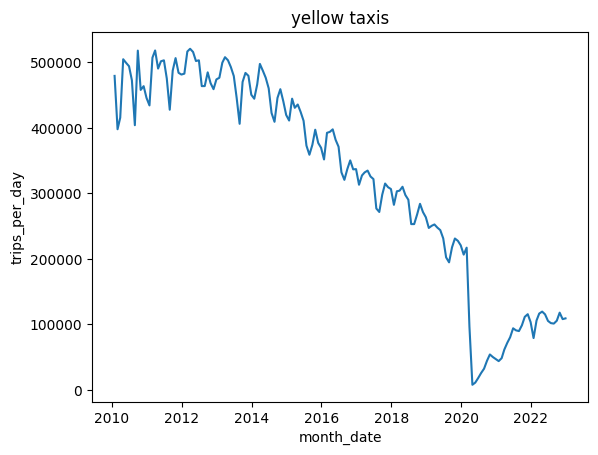

In [475]:
g = sns.lineplot(x=yellow.index,y=yellow['trips_per_day'],data=yellow['trips_per_day']) 
plt.title("yellow taxis")                                          
plt.show(g)  

In [477]:
yellow.to_csv('yellow.csv')
yellow = pd.read_csv('yellow.csv',index_col=['month_date'])
yellow.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 2010-01-28 to 2022-12-28
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   license_class                           156 non-null    object 
 1   trips_per_day                           156 non-null    int64  
 2   farebox_per_day                         156 non-null    int64  
 3   unique_drivers                          156 non-null    int64  
 4   unique_vehicles                         156 non-null    int64  
 5   vehicles_per_day                        156 non-null    int64  
 6   avg_days_vehicles_on_road               156 non-null    float64
 7   avg_hours_per_day_per_vehicle           156 non-null    float64
 8   avg_days_drivers_on_road                156 non-null    float64
 9   avg_hours_per_day_per_driver            156 non-null    float64
 10  avg_minutes_per_trip                    156 non-nul

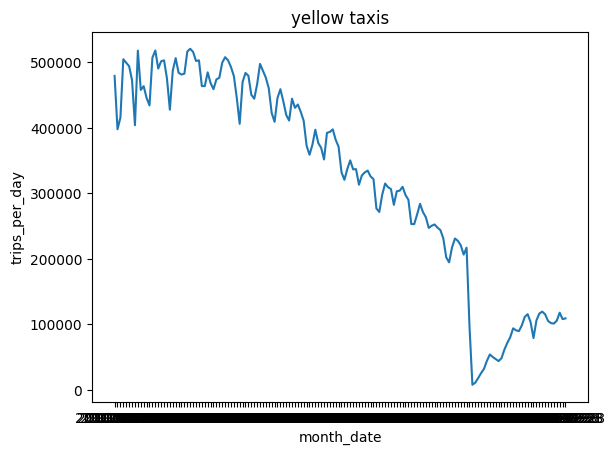

In [478]:
g = sns.lineplot(x=yellow.index,y=yellow['trips_per_day'],data=yellow['trips_per_day']) 
plt.title("yellow taxis")                                          
plt.show(g) 

In [513]:
industry_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 570 to 4
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   license_class                           653 non-null    category      
 1   trips_per_day                           653 non-null    int64         
 2   farebox_per_day                         653 non-null    int64         
 3   unique_drivers                          653 non-null    int64         
 4   unique_vehicles                         653 non-null    int64         
 5   vehicles_per_day                        653 non-null    int64         
 6   avg_days_vehicles_on_road               653 non-null    float64       
 7   avg_hours_per_day_per_vehicle           653 non-null    float64       
 8   avg_days_drivers_on_road                653 non-null    float64       
 9   avg_hours_per_day_per_driver            653 non-null  

In [514]:
# Filtrar las filas donde la columna 'license_class' es igual a 'Green'
green = industry_metrics[industry_metrics['license_class'] == 'Green'].copy()
green = green.set_index('month_date')
green

,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,avg_hours_per_day_per_driver,...,date,month_year1,trips_per_month,farebox_per_month,week,trips_per_week,year,farebox_per_week,total_trips_per_day,shared_trips_per_day_percent
month_date,,,,,,,,,,,,,,,,,,,,,
2013-08-28,Green,283,4028,129,114,33,7.3,5.4,6.8,5.1,...,2013-08,2013-08,8773,124868,34,1981,2013,28196,283,0.0
2013-09-28,Green,1632,23087,478,445,159,10.7,6.3,10.2,6.2,...,2013-09,2013-09,48960,692610,38,11424,2013,161609,1632,0.0
2013-10-28,Green,5477,74128,1261,1128,500,13.7,6.6,12.8,6.3,...,2013-10,2013-10,169787,2297968,43,38339,2013,518896,5477,0.0
2013-11-28,Green,12692,168976,2160,1754,1044,17.9,7.1,15.5,6.6,...,2013-11,2013-11,380760,5069280,47,88844,2013,1182832,12692,0.0
2013-12-28,Green,19435,257398,3317,2736,1707,19.3,6.8,16.9,6.4,...,2013-12,2013-12,602485,7979338,51,136045,2013,1801786,19435,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-28,Green,2126,38915,962,925,475,16.0,3.5,15.5,3.4,...,2022-08,2022-08,65906,1206365,34,14882,2022,272405,2126,0.0
2022-09-28,Green,2300,43814,964,928,491,15.9,3.6,15.4,3.5,...,2022-09,2022-09,69000,1314420,39,16100,2022,306698,2300,0.0
2022-10-28,Green,2236,39960,965,929,485,16.2,3.5,15.8,3.5,...,2022-10,2022-10,69316,1238760,43,15652,2022,279720,2236,0.0


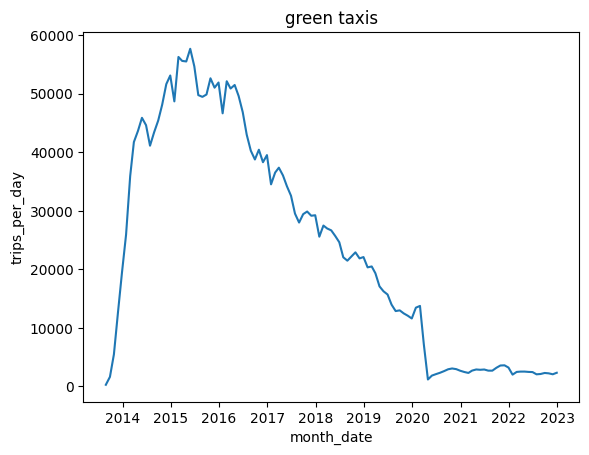

In [515]:
g = sns.lineplot(x=green.index,y=green['trips_per_day'],data=green['trips_per_day']) 
plt.title("green taxis")                                          
plt.show(g) 

In [ ]:
green.to_csv('green.csv')
green = pd.read_csv('green.csv',index_col=['month_date'])

In [516]:
# Filtrar las filas donde la columna 'license_class' es igual a 'FHV - High Volume'
FHVHV = industry_metrics[industry_metrics['license_class'] == 'FHV - High Volume'].copy()
FHVHV = FHVHV.set_index('month_date')


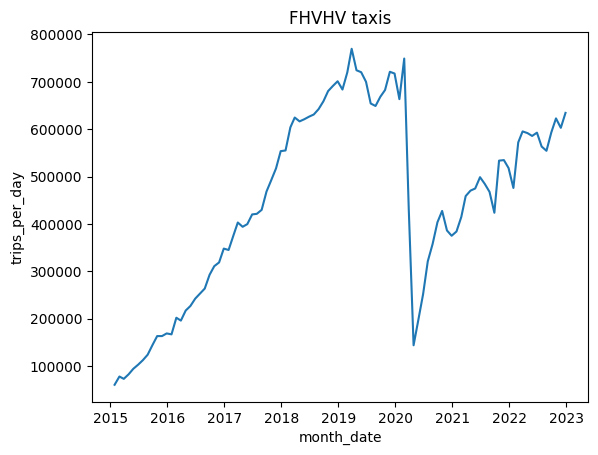

In [517]:
g = sns.lineplot(x=FHVHV.index,y=FHVHV['trips_per_day'],data=FHVHV['trips_per_day']) 
plt.title("FHVHV taxis")                                          
plt.show(g) 

In [ ]:
FHVHV.to_csv('FHVHV.csv')
FHVHV = pd.read_csv('FHVHV.csv',index_col=['month_date'])
FHVHV

In [518]:
# Filtrar las filas donde la columna 'license_class' es igual a 'FHV - High Volume'
FHV = industry_metrics[industry_metrics['license_class'] == 'FHV'].copy()
FHV = FHV.set_index('month_date')

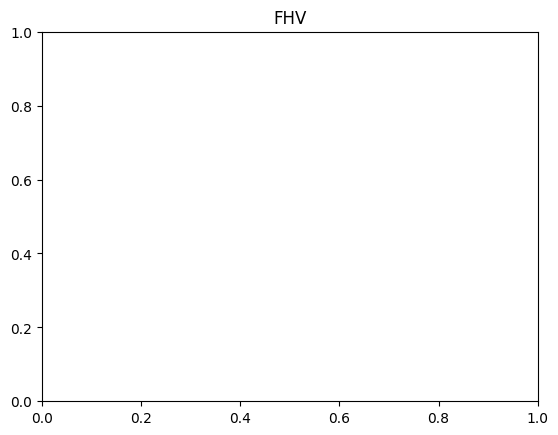

In [519]:
f = sns.lineplot(x=FHV.index,y=FHV['trips_per_day'],data=FHV['trips_per_day']) 
plt.title("FHV")                                          
plt.show(f) 